# Boston Homes Price Prediction Flow

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [10]:
X, y = pd.DataFrame(data['data'], columns = data.feature_names), pd.Series(data['target'], name='MEDV')
X.head()
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


The feature names are as follows:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000 USD
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

## EDA

In [36]:
full_df = X.copy()
full_df['MEDV'] = y

In [37]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [38]:
full_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


No missing values, which is good. 

Next, we'll take a look at how our data looks.

We'll start with the target first.


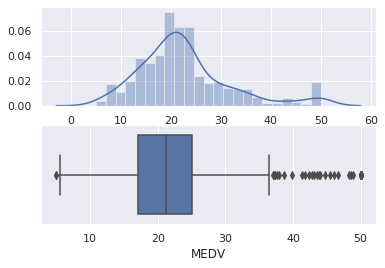

In [51]:
plt.subplot(2,1,1)
sns.distplot(y)

plt.subplot(2,1,2)
sns.boxplot(y)

Looks like the target is not too drastic in its distribution. There are some more expensive houses, which may be used for later analysis. 

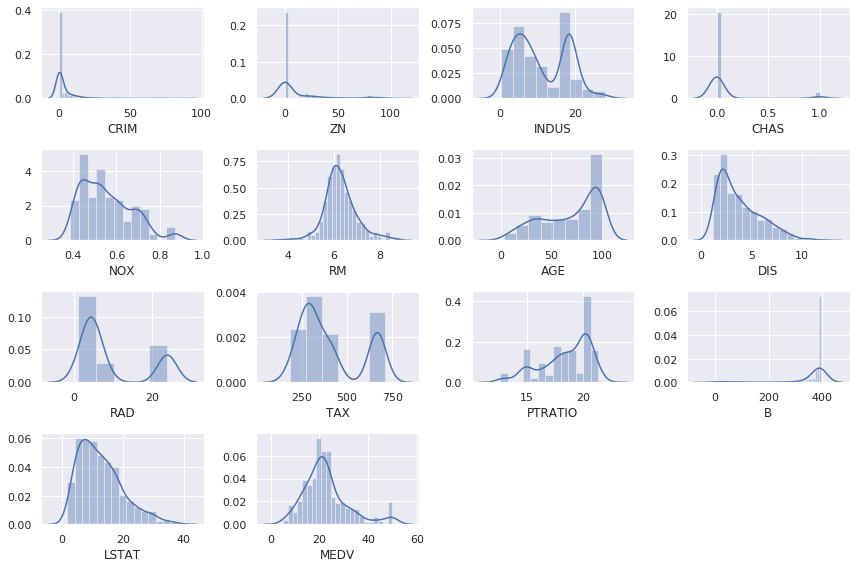

In [84]:
fig = plt.figure(figsize = (12, 8))

for idx, feature in enumerate(list(full_df.columns)):
    idx +=1
    plt.subplot(4,4,idx)
    sns.distplot(full_df[feature])
    idx+=1
    
plt.tight_layout()

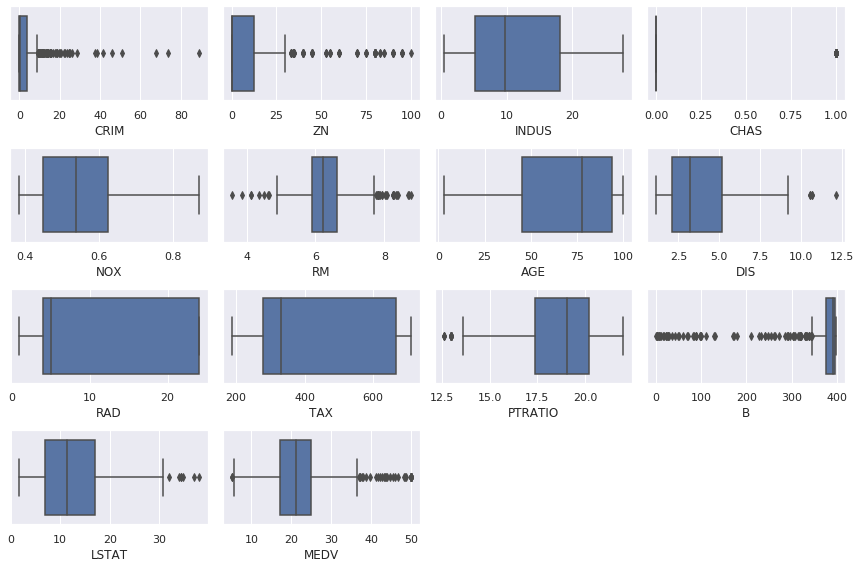

In [66]:
fig = plt.figure(figsize = (12, 8))

for idx, feature in enumerate(list(full_df.columns)):
    idx +=1
    plt.subplot(4,4,idx)
    sns.boxplot(full_df[feature])
    idx+=1
    
plt.tight_layout()

Some things to note: most features do not follow a normal distribution, so some massaging is required. 

Box plots show that there are most likely outliers too, so the outlier handling is needed as well. 

Will have to experiment with ordering.

Next, look at correlation of features with target. 

<Figure size 864x576 with 0 Axes>

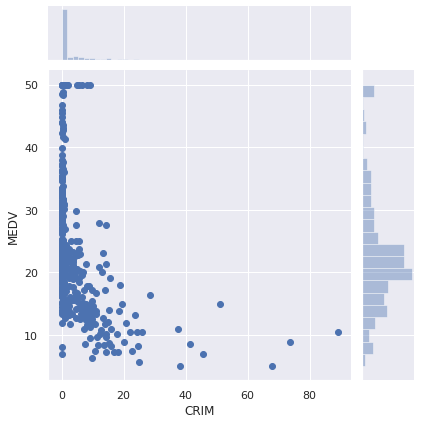

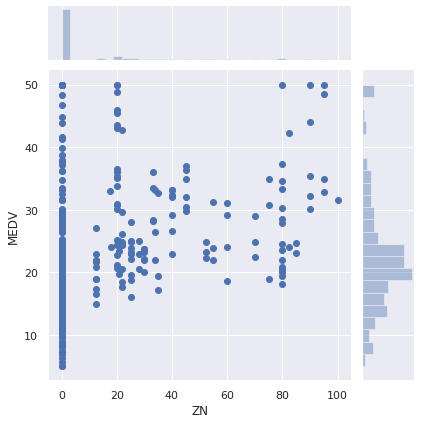

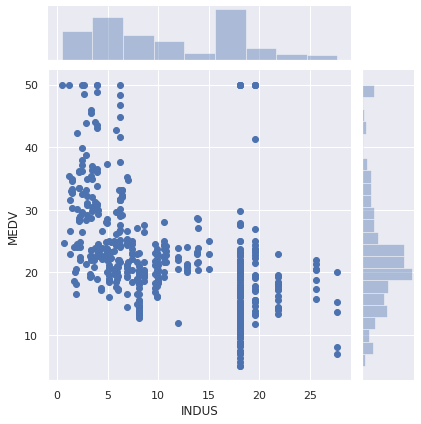

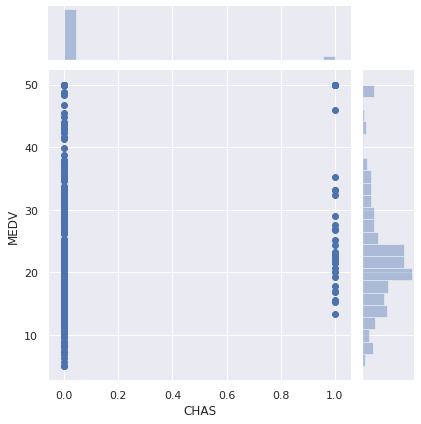

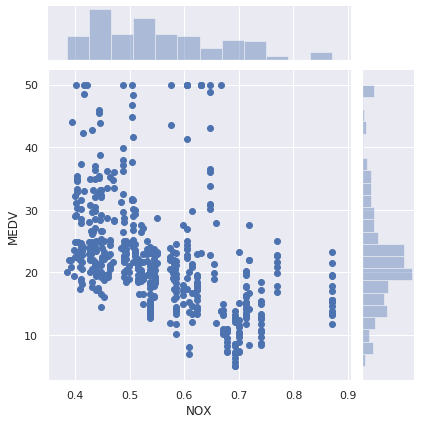

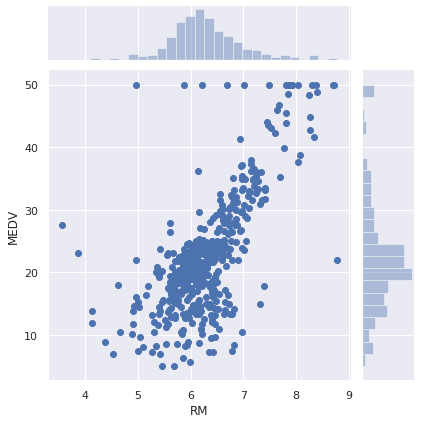

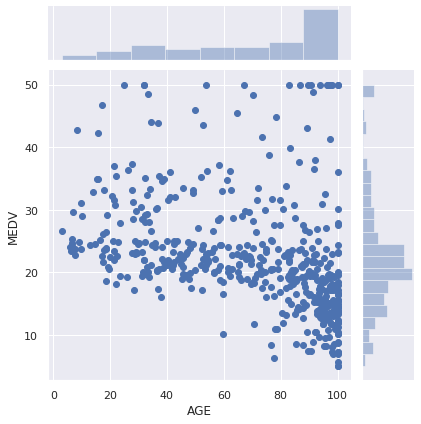

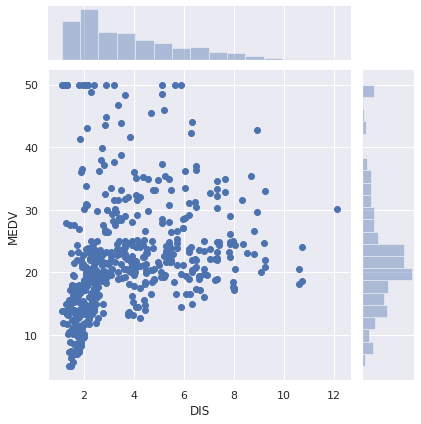

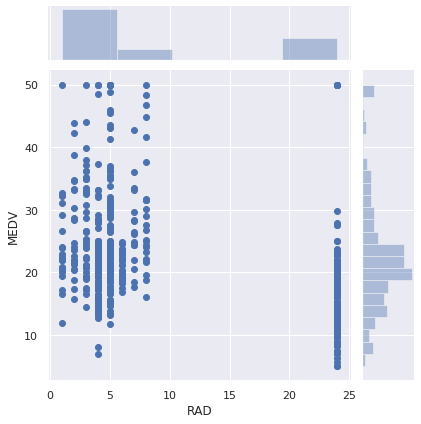

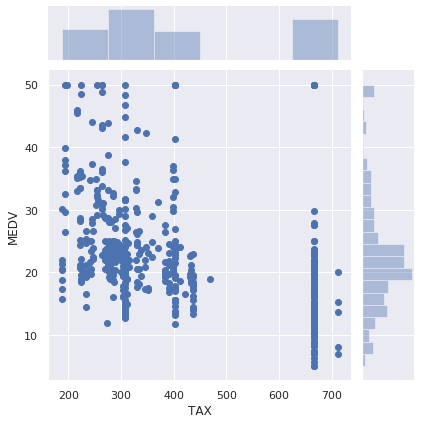

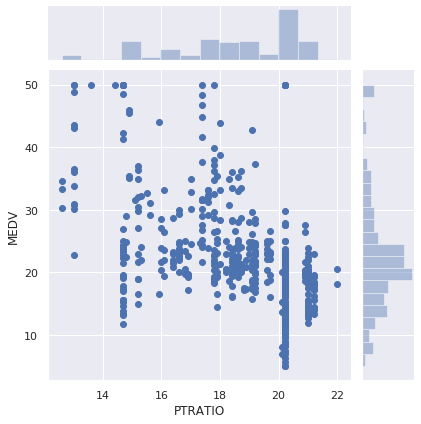

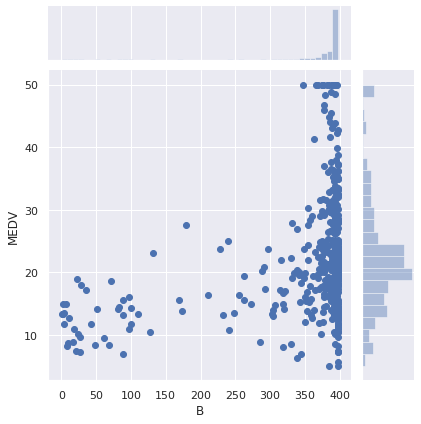

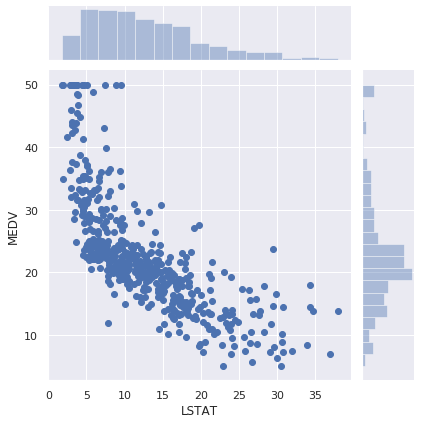

In [89]:

for feature in X.columns:
    sns.jointplot(x = feature, y = 'MEDV', data = full_df)
    
    

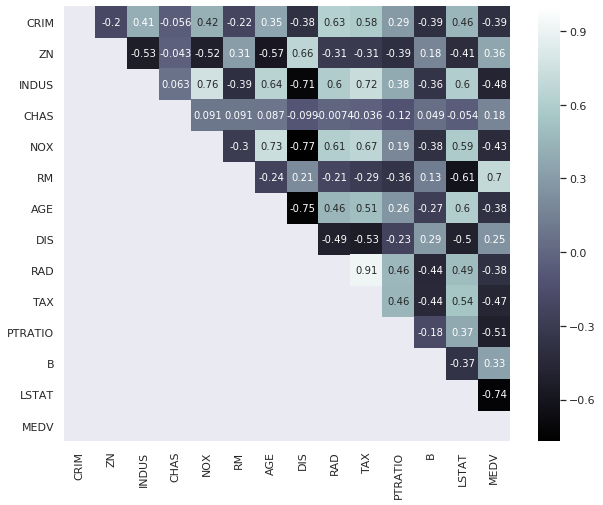

In [69]:
#create heatmap
mask = np.tril(np.ones_like(full_df.corr(), dtype=bool))

full_df_corr = full_df.corr(method = 'pearson')

plt.figure(figsize=(10,8))
sns.heatmap(full_df_corr, annot=True, cmap = 'bone', mask = mask)

From the heatmap, let's take a couple of features that have strong correlation with the target, 'MEDV', and look at them a little more in depth.

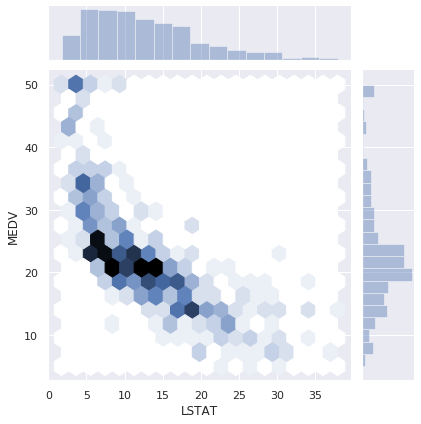

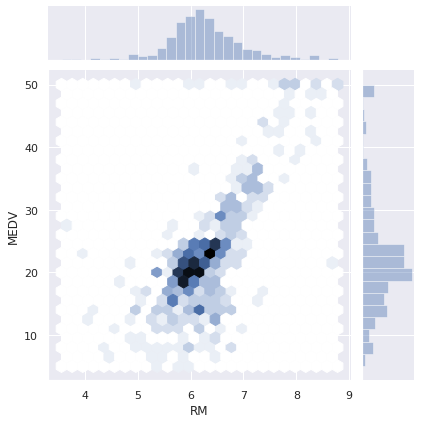

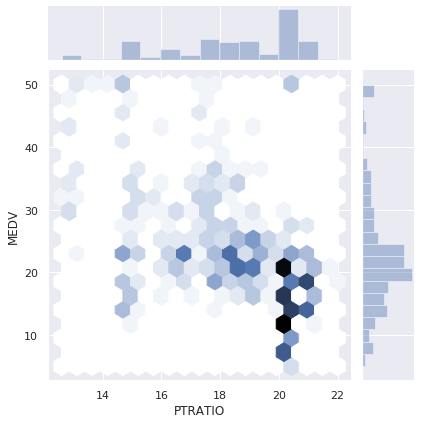

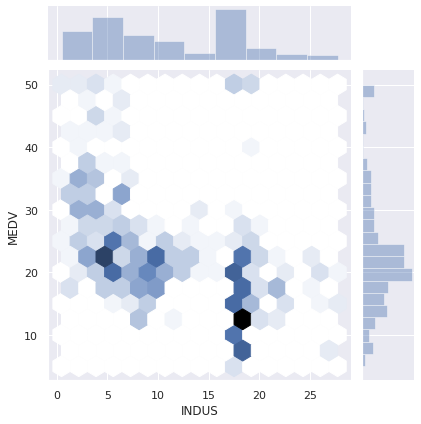

In [73]:
corr_feat_y = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']

for feature in corr_feat_y:
    sns.jointplot(x = str(feature), y ='MEDV', data = full_df, kind = 'hex')



Some notes: generally, as LSTAT increases, MEDV decreases, which is self-explanatory.

As average number of rooms increases, there is a fairly linear increase in MEDV. 

For both PTRATIO and INDUS, it seems that after a certain proportion, the variability of MEDV decreases, though this might be a sample size contigency. There arent that many houses in the PTRATIO > 20 & INDUS > ~ 18 values. 


In addition to correlations with the target, there were also some features that were highly correlated to other features. This can be problematic, so we'll investigate here.

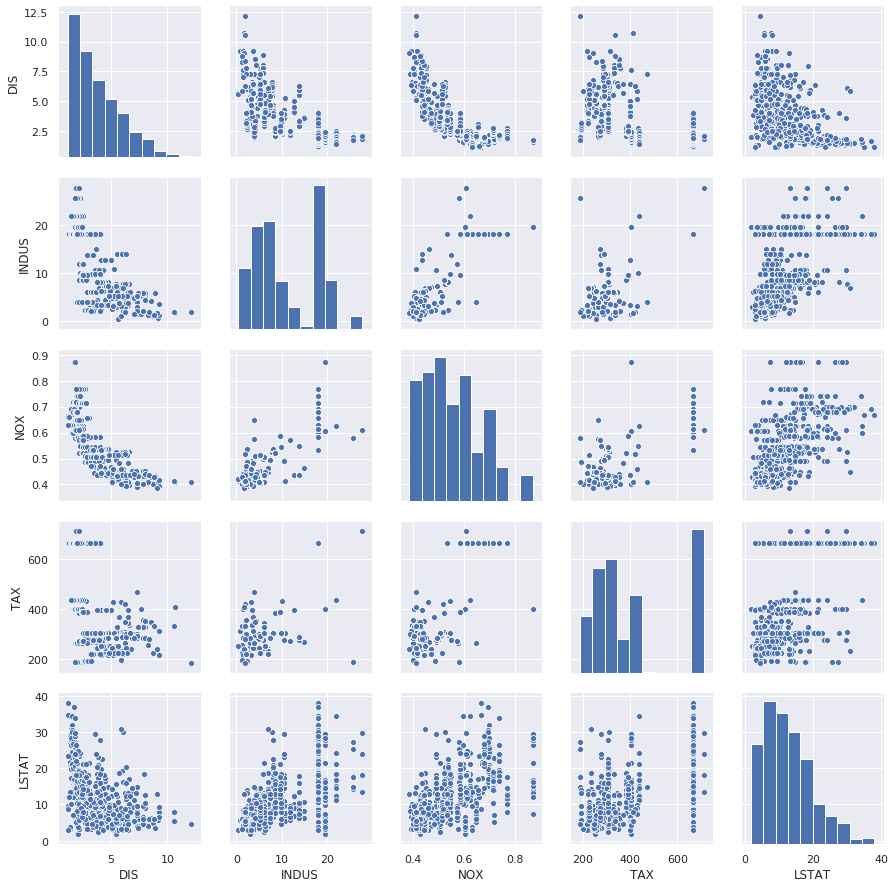

In [71]:
corr_feat_x = ['DIS', 'INDUS', 'NOX', 'TAX', 'LSTAT']

sns.pairplot(full_df[corr_feat_x])

DIS has an interesting "negatively exponential" shape when plotted with NOX; the farther away the house is from the employment centers, the seemingly slower the NOX value drops off, until it relatively stabalizes. 

One other high correlation is between TAX and RAD. Let's look at that.

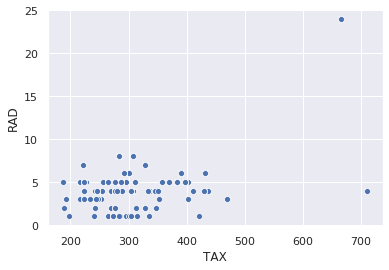

In [83]:
sns.scatterplot(x='TAX', y = 'RAD', data = full_df)

Quickly look at skewness for all features

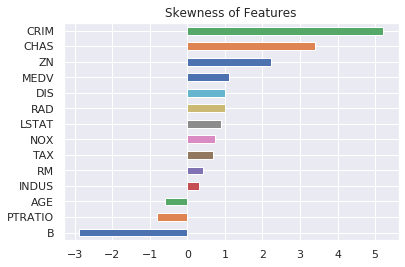

In [82]:
full_df.skew().sort_values(ascending=True).plot(kind = 'barh', title = "Skewness of Features")

Some features have a slight skewness, and some have a large skewness. 

A couple of features appear to have outliers. 

